<a href="https://colab.research.google.com/github/chebbin/datasci_7_geospatial/blob/main/code/507_geospatial_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import geopandas as gpd
import pandas as pd
import numpy as np



Dataset #1:

https://catalog.data.gov/dataset/children-under-18-medicaidvisits-to-the-er-due-to-diabetes-cbf99

In [75]:
df_gpd1= gpd.read_file('/content/KEEDPublishingERVisits_Updated.geojson')
df_gpd1

,OBJECTID,ZCTA5CE10,ALAND10,County,GlobalID,INTPTLON10_1,ID,Zip,Visits_Age_0_to_17,geometry
0,1,48371,110655621,None,934f66a2-f12b-4b3e-b9c6-2e22052a5703,-083.2915307,NaN,None,NaN,"MULTIPOLYGON (((-83.33727 42.89737, -83.33386 ..."
1,2,48380,65730039,None,2f1d0f19-8027-408a-9b8b-60ae9951c3f8,-083.6668237,44.0,48380,2.0,"POLYGON ((-83.67152 42.53163, -83.67237 42.531..."
2,3,48081,10178038,None,af8fec7d-cde1-4321-955f-d25e9c9b1689,-082.8950389,NaN,None,NaN,"POLYGON ((-82.91718 42.49516, -82.91731 42.496..."
3,4,48315,33063561,None,948472bf-36d4-4d89-864c-62a48708331a,-082.9965620,18.0,48315,1.0,"POLYGON ((-83.01949 42.69017, -83.02012 42.691..."
4,5,48317,31361812,None,8a478f90-bd2d-486d-89a6-71e2ae577915,-083.0519717,19.0,48317,6.0,"POLYGON ((-83.03687 42.61642, -83.03692 42.616..."
...,...,...,...,...,...,...,...,...,...,...
154,169,48235,16189821,Wayne,315fc2a7-dd60-45cb-9aba-cece9742fb52,-083.1948030,95.0,48235,13.0,"POLYGON ((-83.17050 42.44073, -83.17041 42.438..."
155,170,48124,22934067,Wayne,3b735fc1-58be-4e63-b8af-f3850269abce,-083.2476095,51.0,48124,2.0,"MULTIPOLYGON (((-83.26050 42.31312, -83.25964 ..."
156,172,48154,30085171,Wayne,d7053496-6cea-400b-b8c8-55bb378b88c2,-083.3723195,NaN,None,NaN,"POLYGON ((-83.43144 42.38667, -83.43146 42.387..."
157,173,48240,9695508,Wayne,0626946e-845b-4a8f-b6e6-0ec0cebe38df,-083.3013004,98.0,48240,2.0,"POLYGON ((-83.28737 42.40697, -83.28744 42.406..."


In [76]:
df_gpd1.dtypes

OBJECTID                 int64
ZCTA5CE10               object
ALAND10                  int64
County                  object
GlobalID                object
INTPTLON10_1            object
ID                     float64
Zip                     object
Visits_Age_0_to_17     float64
geometry              geometry
dtype: object

2013 Medicaid figures for southeast Michigan counties of Wayne, Oakland, and Macomb at the ZCTA level. This data represent number of visits, they are not counts of different individuals, only of visits. One person could have had multiple visits and each visit would be counted. Blank cells indicate no visits. Most specific location data given is zip code.

In [77]:
# Change Blank cells which indicate no visits to 0 visits
df_gpd1['Visits_Age_0_to_17'] = df_gpd['Visits_Age_0_to_17'].replace(np.nan, 0)
df_gpd1

,OBJECTID,ZCTA5CE10,ALAND10,County,GlobalID,INTPTLON10_1,ID,Zip,Visits_Age_0_to_17,geometry
0,1,48371,110655621,None,934f66a2-f12b-4b3e-b9c6-2e22052a5703,-083.2915307,NaN,None,0.0,"MULTIPOLYGON (((-83.33727 42.89737, -83.33386 ..."
1,2,48380,65730039,None,2f1d0f19-8027-408a-9b8b-60ae9951c3f8,-083.6668237,44.0,48380,2.0,"POLYGON ((-83.67152 42.53163, -83.67237 42.531..."
2,3,48081,10178038,None,af8fec7d-cde1-4321-955f-d25e9c9b1689,-082.8950389,NaN,None,0.0,"POLYGON ((-82.91718 42.49516, -82.91731 42.496..."
3,4,48315,33063561,None,948472bf-36d4-4d89-864c-62a48708331a,-082.9965620,18.0,48315,1.0,"POLYGON ((-83.01949 42.69017, -83.02012 42.691..."
4,5,48317,31361812,None,8a478f90-bd2d-486d-89a6-71e2ae577915,-083.0519717,19.0,48317,6.0,"POLYGON ((-83.03687 42.61642, -83.03692 42.616..."
...,...,...,...,...,...,...,...,...,...,...
154,169,48235,16189821,Wayne,315fc2a7-dd60-45cb-9aba-cece9742fb52,-083.1948030,95.0,48235,13.0,"POLYGON ((-83.17050 42.44073, -83.17041 42.438..."
155,170,48124,22934067,Wayne,3b735fc1-58be-4e63-b8af-f3850269abce,-083.2476095,51.0,48124,2.0,"MULTIPOLYGON (((-83.26050 42.31312, -83.25964 ..."
156,172,48154,30085171,Wayne,d7053496-6cea-400b-b8c8-55bb378b88c2,-083.3723195,NaN,None,0.0,"POLYGON ((-83.43144 42.38667, -83.43146 42.387..."
157,173,48240,9695508,Wayne,0626946e-845b-4a8f-b6e6-0ec0cebe38df,-083.3013004,98.0,48240,2.0,"POLYGON ((-83.28737 42.40697, -83.28744 42.406..."


In [84]:
df_gpd1_revised = df_gpd1[['Visits_Age_0_to_17', 'County', 'Zip', 'geometry']]
df_gpd1_revised



,Visits_Age_0_to_17,County,Zip,geometry
0,0.0,None,None,"MULTIPOLYGON (((-83.33727 42.89737, -83.33386 ..."
1,2.0,None,48380,"POLYGON ((-83.67152 42.53163, -83.67237 42.531..."
2,0.0,None,None,"POLYGON ((-82.91718 42.49516, -82.91731 42.496..."
3,1.0,None,48315,"POLYGON ((-83.01949 42.69017, -83.02012 42.691..."
4,6.0,None,48317,"POLYGON ((-83.03687 42.61642, -83.03692 42.616..."
...,...,...,...,...
154,13.0,Wayne,48235,"POLYGON ((-83.17050 42.44073, -83.17041 42.438..."
155,2.0,Wayne,48124,"MULTIPOLYGON (((-83.26050 42.31312, -83.25964 ..."
156,0.0,Wayne,None,"POLYGON ((-83.43144 42.38667, -83.43146 42.387..."
157,2.0,Wayne,48240,"POLYGON ((-83.28737 42.40697, -83.28744 42.406..."


<Axes: >

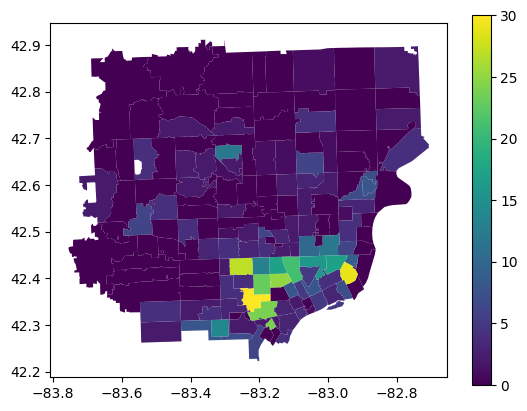

In [85]:
df_gpd1_revised.plot('Visits_Age_0_to_17', legend=True)

Highest rates of diabetes related ER admissions for children on medicaid is in the southeast region of southeast Michigan counties of Wayne, Oakland, and Macomb.

Dataset #2

https://catalog.data.gov/dataset/school-neighborhood-poverty-estimates-current-c7e05

In [80]:
df_gpd2= gpd.read_file('/content/School_Neighborhood_Poverty_Estimates_-_Current.geojson')
df_gpd2

,OBJECTID,NAME,NCESSCH,IPR_EST,IPR_SE,SCHOOLYEAR,LAT,LON,geometry
0,1,Albertville Middle School,010000500870,259,87,2020-2021,34.260200,-86.206200,POINT (-86.20620 34.26021)
1,2,Albertville High School,010000500871,261,92,2020-2021,34.262200,-86.204900,POINT (-86.20490 34.26221)
2,3,Albertville Intermediate School,010000500879,139,61,2020-2021,34.273300,-86.220100,POINT (-86.22010 34.27331)
3,4,Albertville Elementary School,010000500889,227,110,2020-2021,34.252700,-86.221806,POINT (-86.22181 34.25271)
4,5,Albertville Kindergarten and PreK,010000501616,373,124,2020-2021,34.289800,-86.193300,POINT (-86.19330 34.28981)
...,...,...,...,...,...,...,...,...,...
100677,100678,Kapolei Charter School by Goodwill Hawaii,150003000302,402,76,2020-2021,21.318517,-158.091082,POINT (-158.09110 21.31852)
100678,100679,Kamalani Academy,150003000303,327,86,2020-2021,21.501790,-158.015561,POINT (-158.01558 21.50179)
100679,100680,Alaka'i O Kaua'i Charter School,150003000304,339,105,2020-2021,21.962163,-159.478260,POINT (-159.47827 21.96217)
100680,100681,DreamHouse Ewa Beach,150003000305,438,40,2020-2021,21.326883,-158.020284,POINT (-158.02030 21.32689)


From data.gov describing the dataset:

The 2018-2019 School Neighborhood Poverty Estimates are based on school locations from the 2018-2019 Common Core of Data (CCD) school file and income data from families with children ages 5 to 18 in the U.S. Census Bureauâ€™s 2015-2019 American Community Survey (ACS) 5-year collection. The ACS is a continuous household survey that collects social, demographic, economic, and housing information from the population in the United States each month. The Census Bureau calculates the income-to-poverty ratio (IPR) based on money income reported for families relative to the poverty thresholds, which are determined based on the family size and structure. The IPR is the percentage of family income that is above or below the federal poverty level. The IPR indicator ranges from 0 to a top-coded value of 999. A family with income at the poverty threshold has an IPR value of 100.

In [81]:
df_gpd2.dtypes

OBJECTID         int64
NAME            object
NCESSCH         object
IPR_EST          int64
IPR_SE           int64
SCHOOLYEAR      object
LAT            float64
LON            float64
geometry      geometry
dtype: object

In [88]:
# Columns of interest
df_gpd2_revised = df_gpd2[['NAME', 'IPR_EST', 'geometry']]
df_gpd2_revised

,NAME,IPR_EST,geometry
0,Albertville Middle School,259,POINT (-86.20620 34.26021)
1,Albertville High School,261,POINT (-86.20490 34.26221)
2,Albertville Intermediate School,139,POINT (-86.22010 34.27331)
3,Albertville Elementary School,227,POINT (-86.22181 34.25271)
4,Albertville Kindergarten and PreK,373,POINT (-86.19330 34.28981)
...,...,...,...
100677,Kapolei Charter School by Goodwill Hawaii,402,POINT (-158.09110 21.31852)
100678,Kamalani Academy,327,POINT (-158.01558 21.50179)
100679,Alaka'i O Kaua'i Charter School,339,POINT (-159.47827 21.96217)
100680,DreamHouse Ewa Beach,438,POINT (-158.02030 21.32689)


<Axes: >

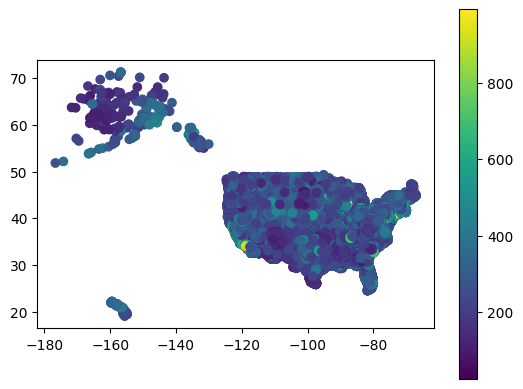

In [89]:
df_gpd2_revised.plot('IPR_EST', legend=True)

Dataset #3

https://catalog.data.gov/dataset/hospitalization-discharge-rates-49dd7

Hospitalization Discharge Rates for the different zip codes in Lake County, Illinois. Each number is a rate per 100,000.

In [90]:
df_gpd3= gpd.read_file('/content/Hospitalization_Discharge_Rates.geojson')
df_gpd3

,OBJECTID,ZIP,Anxiety_Di,Mood_Disor,Alcohol_re,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC,SHAPE_Length,SHAPE_Area,geometry
0,1,60002,393.608997,359.322499,270.177604,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0.0,0.730857,0.011686,"MULTIPOLYGON (((-87.95158 42.49462, -87.95238 ..."
1,2,60010,132.835014,153.848463,177.863833,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0.0,0.585157,0.008129,"MULTIPOLYGON (((-88.11591 42.24075, -88.11719 ..."
2,3,60015,142.476163,231.371546,147.347143,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0.0,0.371889,0.003720,"MULTIPOLYGON (((-87.85212 42.20407, -87.85280 ..."
3,4,60020,201.704730,452.208992,406.662763,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0.0,0.299823,0.001693,"MULTIPOLYGON (((-88.16098 42.41559, -88.15756 ..."
4,5,60030,261.648844,237.033796,250.708822,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0.0,0.796327,0.008580,"MULTIPOLYGON (((-87.99991 42.36220, -87.99876 ..."
5,6,60031,240.857947,234.704641,178.445851,60.977830,31.854090,29.123739,20.239979,8939.144091,598.628692,962.552743,0.0,0.533165,0.005353,"MULTIPOLYGON (((-87.92865 42.41420, -87.92713 ..."
6,7,60035,129.593011,256.951660,245.779848,25.992225,14.691258,19.211645,18.579208,10150.264976,688.323223,959.658589,0.0,0.372889,0.003501,"MULTIPOLYGON (((-87.80925 42.22496, -87.80912 ..."
7,8,60040,123.456790,308.641975,320.987654,18.072289,6.024096,6.024096,12.860082,9593.675308,685.185185,1037.037037,0.0,0.080798,0.000180,"MULTIPOLYGON (((-87.80793 42.21416, -87.80724 ..."
8,9,60042,261.025401,374.006545,214.274583,89.011167,16.183849,56.643470,13.879149,9951.332561,743.630201,1351.877825,0.0,0.135803,0.000458,"MULTIPOLYGON (((-88.17899 42.26233, -88.17905 ..."
9,10,60044,182.450343,230.644773,289.166581,35.961815,26.154047,22.884791,12.992508,9021.992500,575.751317,1025.852869,0.0,0.293811,0.002158,"MULTIPOLYGON (((-87.89245 42.30946, -87.89228 ..."


In [91]:
df_gpd3.dtypes

OBJECTID           int64
ZIP               object
Anxiety_Di       float64
Mood_Disor       float64
Alcohol_re       float64
Diabetes         float64
Hypertensi       float64
Asthma           float64
F65_FallsER      float64
Discharges       float64
MH_ER            float64
Total_MH         float64
Total_ACSC       float64
SHAPE_Length     float64
SHAPE_Area       float64
geometry        geometry
dtype: object

In [92]:
# Look at the rate for discharges for Senior Falls Emergency Room Visit
# Senior falls refers to individuals who are 65 years or older who have a fall and injure themselves.
df_gpd3_revised = df_gpd3[['ZIP', 'F65_FallsER']]
df_gpd3_revised

,ZIP,F65_FallsER
0,60002,14.946770
1,60010,9.941825
2,60015,19.079395
3,60020,23.283437
4,60030,20.297185
5,60031,20.239979
6,60035,18.579208
7,60040,12.860082
8,60042,13.879149
9,60044,12.992508


In [101]:
df_gpd3_revised.plot("F65_FallsER", legend=True)

TypeError: ignored

Don't understand this error message as I don't see any non-numeric frames

Dataset #4

https://catalog.data.gov/dataset/healthinsurancecoverage-d3b6c

Health insurance coverage rates, from the American Community Survey, 2014 5-year Average, by Zip. For the Detroit Tri-County region. Data Driven Detroit calculated the rates by dividing the total number of insured by the total number of people in each age group.*italicized text*

In [102]:
df_gpd4= gpd.read_file('/content/HealthInsuranceCoverage.geojson')
df_gpd4

,OBJECTID,GEOID10,TotalCivilianPop,WithHealthInsurance,NoHealthInsurance,Pct_Insured,WithInsurance_U18,NoInsurance_U18,Pct_Insured_U18,geometry
0,1,2648371,23014,21364,1650,0.928305,5789,123,0.979195,"MULTIPOLYGON (((-83.33727 42.89737, -83.33386 ..."
1,2,2648380,7064,6716,348,0.950736,1608,33,0.979890,"POLYGON ((-83.67152 42.53163, -83.67237 42.531..."
2,3,2648081,20565,18725,1840,0.910528,3921,77,0.980740,"POLYGON ((-82.91718 42.49516, -82.91731 42.496..."
3,4,2648315,26833,25097,1736,0.935304,5466,92,0.983447,"POLYGON ((-83.01949 42.69017, -83.02012 42.691..."
4,5,2648317,26511,23397,3114,0.882539,5598,256,0.956269,"POLYGON ((-83.03687 42.61642, -83.03692 42.616..."
...,...,...,...,...,...,...,...,...,...,...
173,174,2648124,30505,27822,2683,0.912047,6265,225,0.965331,"MULTIPOLYGON (((-83.26050 42.31312, -83.25964 ..."
174,175,2648183,42363,39498,2865,0.932370,9222,164,0.982527,"POLYGON ((-83.26583 42.12674, -83.26675 42.128..."
175,176,2648154,37431,35536,1895,0.949374,7169,102,0.985972,"POLYGON ((-83.43144 42.38667, -83.43146 42.387..."
176,177,2648240,17463,15065,2398,0.862681,3795,162,0.959060,"POLYGON ((-83.28737 42.40697, -83.28744 42.406..."


In [103]:
df_gpd4.dtypes

OBJECTID                  int64
GEOID10                  object
TotalCivilianPop          int64
WithHealthInsurance       int64
NoHealthInsurance         int64
Pct_Insured             float64
WithInsurance_U18         int64
NoInsurance_U18           int64
Pct_Insured_U18         float64
geometry               geometry
dtype: object

In [104]:
# Look at the percentage of people insured by zip code
df_gpd4_revised = df_gpd4[['GEOID10', 'Pct_Insured']]
df_gpd4_revised

,GEOID10,Pct_Insured
0,2648371,0.928305
1,2648380,0.950736
2,2648081,0.910528
3,2648315,0.935304
4,2648317,0.882539
...,...,...
173,2648124,0.912047
174,2648183,0.932370
175,2648154,0.949374
176,2648240,0.862681


In [105]:
df_gpd4_revised.plot('Pct_Insured', legend=True)

TypeError: ignored

Same error message as before, I don't know why. Going to stop here as I keep getting the same error message.